In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


from sklearn.metrics import precision_recall_fscore_support 
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_json('DiSmldata.json')

In [3]:
my_stop_words = ENGLISH_STOP_WORDS.union(['disneyland','tokyo','disney', 'im', 'tdrnow','paris','california','amp','disneysea','got',
                                         'ºc', 'ºf', 'ºoº','𝗧𝗵𝗲','くまのプーさん', 'ディズニー', 'ディズニーシー','ディズニーハロウィーン',
                                         'ディズニーランド', 'ディズニー好きと繋がりたい', 'フェスティバルオブミスティーク', 'マルマン',
                                         'ㅋㅋㅋ', '場所', '更新', '月released', '東京ディズニーシー', '東京ディズニーランド', '東京ディズニーリゾート',
                                         '香港迪士尼樂園', 'ºº', 'hong', 'kong',"disneylandresort", "disneyland", "disneyresort",
                                          "californiaadventure",'downtowndisney','disneyanaheim','disneylandanaheim',
                                          'disneycalifornia','californiadisney','disneysea', 'disneytokyo', 'disneytokyoresort', 
                                          'tokyodisney','tokyodisneyresort', 'tokyodisneyland','東京ディズニーランド', 'ディズニーランド',
                                          '東京ディズニーシー', 'ズニーシー', 'tdr_now', 'tdr_md','tdr','dca','dl'])

In [4]:
#Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(df[['hash_count', 'emoji_count','clean_text',
                                                        'anger','anticipation','disgust','fear',
                                                       'joy', 'sadness', 'surprise', 'trust', 'punc_count',
                                                       'tweet_len','cap_count']], df['label'],test_size =0.20, random_state = 77)

In [5]:
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df.clean_text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = df.label
    return X, y
X, y = make_xy(df)

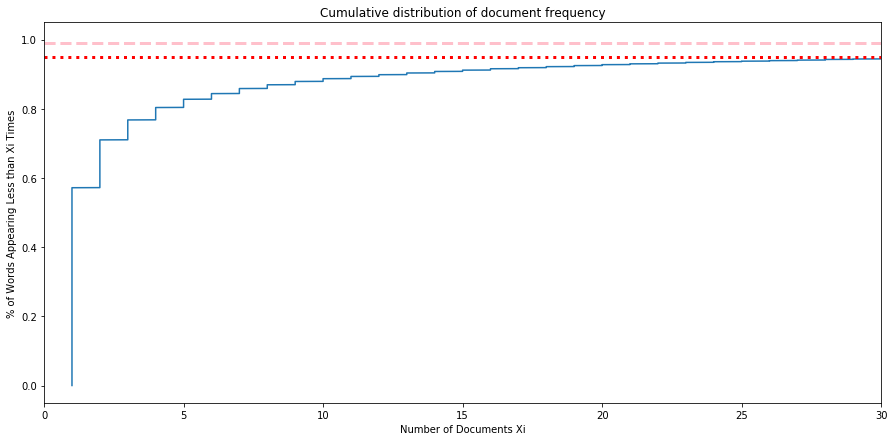

In [6]:
data = np.sum(X>0,axis=0)
sorted_df = np.sort(data).reshape(-1,1)
yvals=np.arange(len(sorted_df))/float(len(sorted_df)-1)
plt.figure(figsize = (15,7))
plt.plot(sorted_df,yvals)
plt.xlim([0,30])
plt.axhline(0.95, c = 'red', linestyle = ':', linewidth = 3)
plt.axhline(0.99, c = 'pink', linestyle = '--', linewidth =3)
plt.xlabel('Number of Documents Xi')
plt.ylabel('% of Words Appearing Less than Xi Times')
plt.title('Cumulative distribution of document frequency')
plt.show()

In [ ]:
# score_log = []
# index_log = []
# for x in range(5000,7000,100):
#     index_log.append(x)
#     count_vecto = CountVectorizer(stop_words = my_stop_words, max_features = x)
#     count_vecto_fit = count_vecto.fit(X_train['clean_text'])

#     count_train = count_vecto_fit.transform(X_train['clean_text'])
#     count_test = count_vecto_fit.transform(X_test['clean_text'])

#     X_train_vect = pd.concat([X_train[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
#                                                            'joy', 'sadness', 'surprise', 'trust', 'punc_count',
#                                                            'tweet_len','cap_count']].reset_index(drop=True), 
#                pd.DataFrame(count_train.toarray())], axis=1)
#     X_test_vect = pd.concat([X_test[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
#                                                            'joy', 'sadness', 'surprise', 'trust', 'punc_count',
#                                                            'tweet_len','cap_count']].reset_index(drop=True), 
#                pd.DataFrame(count_test.toarray())], axis=1)
#     ros = RandomOverSampler(random_state=77)
#     X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train_vect.values, y_train.values)
#     X_resampled_ros_test, y_resampled_ros_test = ros.fit_resample(X_test_vect.values, y_test.values)
#     X_train_scaled = preprocessing.scale(X_resampled_ros)
#     X_test_scaled = preprocessing.scale(X_resampled_ros_test)
#     lr = LogisticRegression(max_iter = 100, solver = 'sag', multi_class = 'multinomial', 
#                         C = 3593.81)
#     lr.fit(X_train_scaled, y_resampled_ros)
#     y_pred = lr.predict(X_test_scaled)
#     score_log.append(round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3))

In [8]:
log_reg = pd.read_csv('log_regclf.csv')

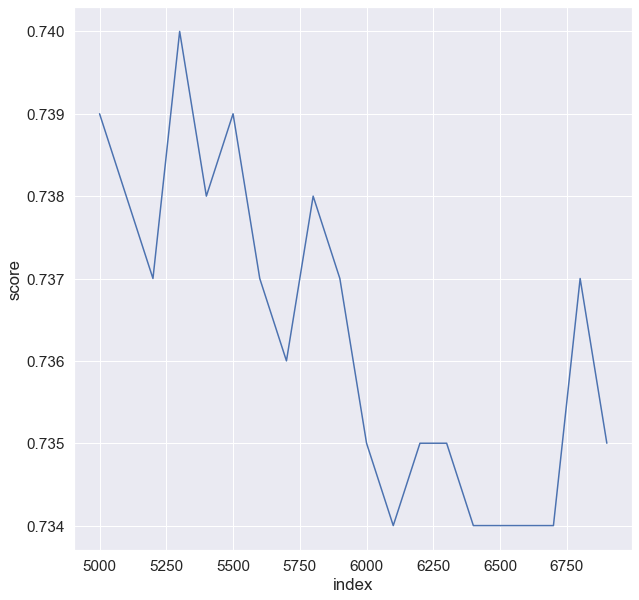

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(log_reg['index'], log_reg['score'])
plt.show()

In [10]:
#Count vectorizer Document term matrix

count_vecto = CountVectorizer(stop_words = my_stop_words, max_features = 5250)
count_vecto_fit = count_vecto.fit(X_train['clean_text'])

count_train = count_vecto_fit.transform(X_train['clean_text'])
count_test = count_vecto_fit.transform(X_test['clean_text'])

X_train_vect = pd.concat([X_train[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
                                                       'joy', 'sadness', 'surprise', 'trust', 'punc_count',
                                                       'tweet_len','cap_count']].reset_index(drop=True), 
           pd.DataFrame(count_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
                                                       'joy', 'sadness', 'surprise', 'trust', 'punc_count',
                                                       'tweet_len','cap_count']].reset_index(drop=True), 
           pd.DataFrame(count_test.toarray())], axis=1)

In [11]:
X_train_vect.shape

(70008, 5263)

In [14]:
#Balance train Data 
ros = RandomOverSampler(random_state=77)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train_vect.values, y_train.values)
print(sorted(Counter(y_resampled_ros).items()))

[(0, 23522), (1, 23522), (2, 23522), (3, 23522), (4, 23522), (5, 23522)]


In [15]:
#Balance test data
X_resampled_ros_test, y_resampled_ros_test = ros.fit_resample(X_test_vect.values, y_test.values)
print(sorted(Counter(y_resampled_ros_test).items()))

[(0, 5982), (1, 5982), (2, 5982), (3, 5982), (4, 5982), (5, 5982)]


In [16]:
#Scale data
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_resampled_ros)
X_test_scaled = preprocessing.scale(X_resampled_ros_test)

In [14]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 100, solver = 'sag', multi_class = 'multinomial')

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fit time: 1445.156 / Predict time: 1.477 ---- Precision: 0.742 / Recall: 0.739 / Accuracy: 0.739


In [16]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 100, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

Fit time: 1447.56 / Predict time: 0.168 ---- Precision: 0.744 / Recall: 0.74 / Accuracy: 0.74


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [17]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 100, solver = 'sag', multi_class = 'multinomial', C = 3500)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fit time: 1452.159 / Predict time: 1.718 ---- Precision: 0.742 / Recall: 0.738 / Accuracy: 0.738


In [24]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 50, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

Fit time: 718.043 / Predict time: 0.159 ---- Precision: 0.744 / Recall: 0.739 / Accuracy: 0.739


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [25]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 40, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fit time: 589.13 / Predict time: 1.738 ---- Precision: 0.745 / Recall: 0.74 / Accuracy: 0.74


In [18]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 25, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fit time: 420.593 / Predict time: 0.609 ---- Precision: 0.746 / Recall: 0.742 / Accuracy: 0.742


In [19]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 15, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fit time: 275.57 / Predict time: 4.201 ---- Precision: 0.746 / Recall: 0.742 / Accuracy: 0.742


In [20]:
#Logistic Regression 

#Instantiate our model
lr = LogisticRegression(max_iter = 20, solver = 'sag', multi_class = 'multinomial', C = 0.01)

#Train our Model
start = time.time()
lr.fit(X_train_scaled, y_resampled_ros)
end = time.time()
fit_time = (end - start)

#Model Predict 
start = time.time()
y_pred = lr.predict(X_test_scaled)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled_ros_test, y_pred, average='macro')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), 
    round((y_pred==y_resampled_ros_test).sum()/len(y_pred), 3)))

Fit time: 366.72 / Predict time: 0.18 ---- Precision: 0.746 / Recall: 0.742 / Accuracy: 0.742


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [21]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_resampled_ros_test, y_pred)

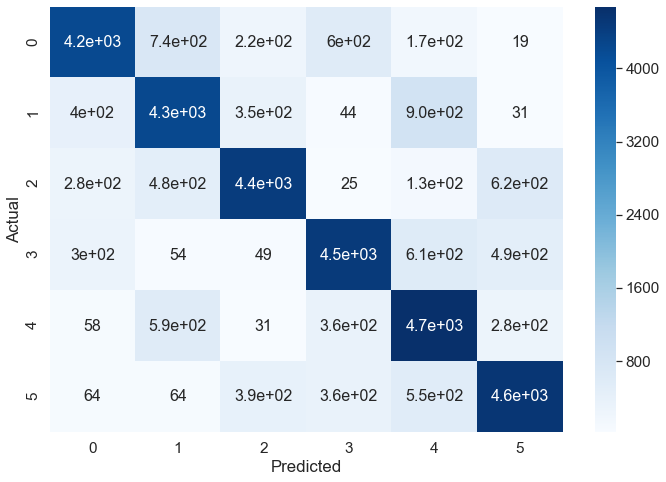

In [36]:
df_cm = pd.DataFrame(cf_matrix , columns=np.unique(y_resampled_ros_test), index = np.unique(y_resampled_ros_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
ax = sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

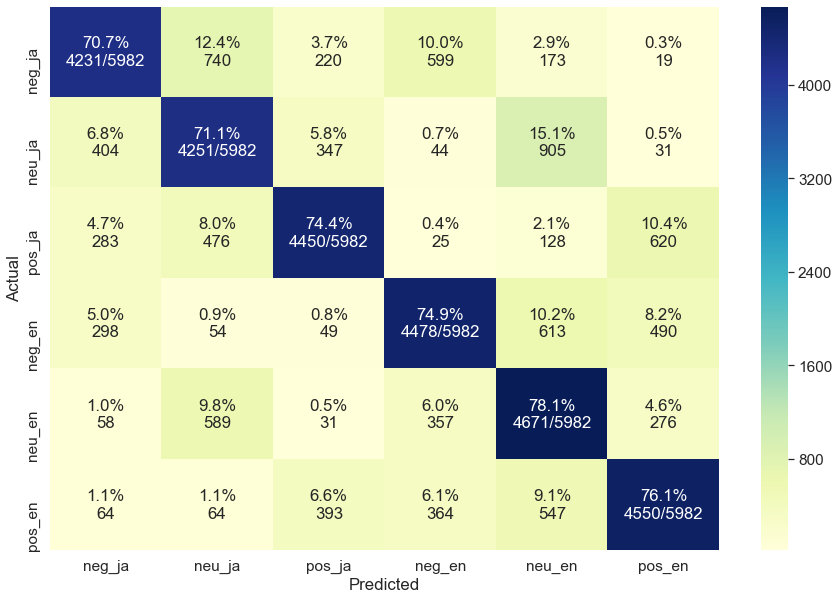

In [37]:
class_names = ['neg_ja', 'neu_ja', 'pos_ja', 'neg_en', 'neu_en', 'pos_en']


def plot_cm(y_true, y_pred, figsize=(15,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_cm(y_resampled_ros_test, y_pred)

Confusion matrix, without normalization
[[4231  740  220  599  173   19]
 [ 404 4251  347   44  905   31]
 [ 283  476 4450   25  128  620]
 [ 298   54   49 4478  613  490]
 [  58  589   31  357 4671  276]
 [  64   64  393  364  547 4550]]
Normalized confusion matrix
[[0.71 0.12 0.04 0.1  0.03 0.  ]
 [0.07 0.71 0.06 0.01 0.15 0.01]
 [0.05 0.08 0.74 0.   0.02 0.1 ]
 [0.05 0.01 0.01 0.75 0.1  0.08]
 [0.01 0.1  0.01 0.06 0.78 0.05]
 [0.01 0.01 0.07 0.06 0.09 0.76]]


<Figure size 1440x1080 with 0 Axes>

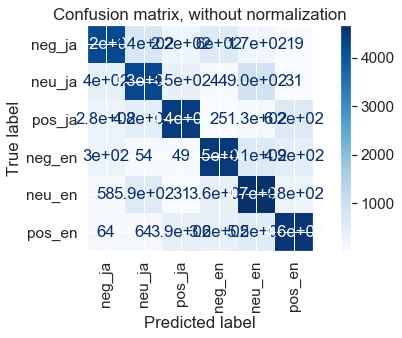

<Figure size 1440x1080 with 0 Axes>

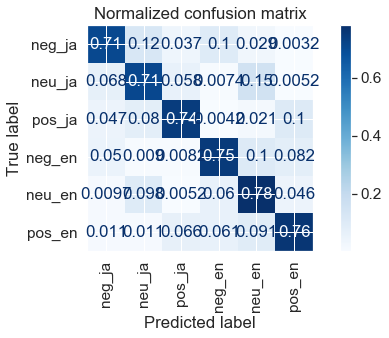

In [53]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure

np.set_printoptions(precision=2)
class_names = ['neg_ja', 'neu_ja', 'pos_ja', 'neg_en', 'neu_en', 'pos_en']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]


for title, normalize in titles_options:


    plt.figure(figsize=(20,15))
    disp = plot_confusion_matrix(lr, X_test_scaled, y_resampled_ros_test,display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    

    print(title)
    print(disp.confusion_matrix)

plt.show()

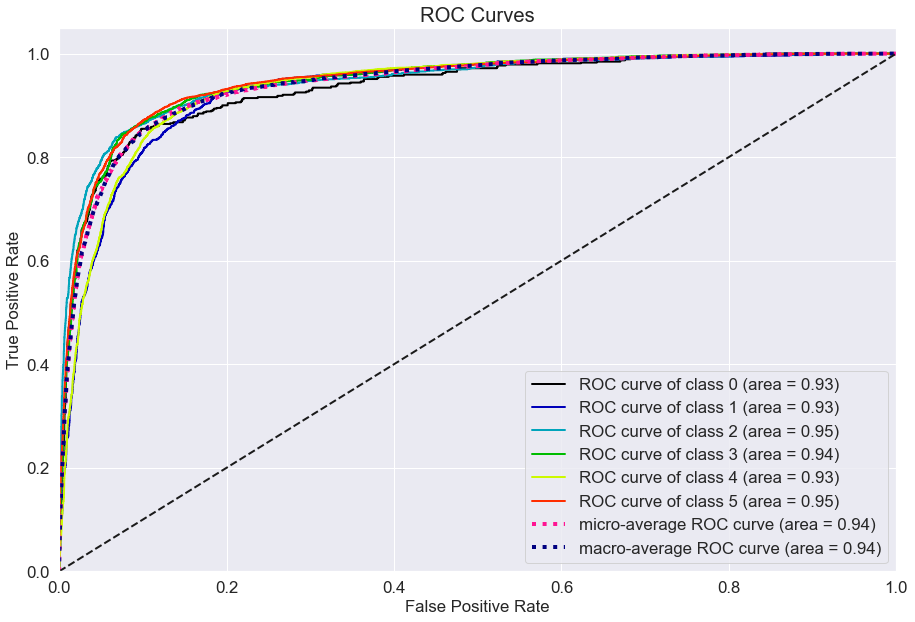

In [25]:
#ROC AUC
import scikitplot as scikitplot #to make things easy
y_pred_proba = lr.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_resampled_ros_test, y_pred_proba, figsize=(15,10))
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

y_prob = lr.predict_proba(X_test_scaled)

macro_roc_auc_ovo = roc_auc_score(y_resampled_ros_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_resampled_ros_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_resampled_ros_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_resampled_ros_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.939315 (macro),
0.939315 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.939315 (macro),
0.939315 (weighted by prevalence)
